In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#read dataset

In [4]:
df=pd.read_csv('/content/drive/MyDrive/diabetes/pima indian diebetes 2023.csv')

In [5]:
df

,n_pregnant,glucose_concentration,blood_pressure_(mm_Hg),skin_thickness_(mm),serum_insulin_(mu_U/ml),BMI,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.head()

,n_pregnant,glucose_concentration,blood_pressure_(mm_Hg),skin_thickness_(mm),serum_insulin_(mu_U/ml),BMI,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   n_pregnant               768 non-null    int64  
 1   glucose_concentration    768 non-null    int64  
 2   blood_pressure_(mm_Hg)   768 non-null    int64  
 3   skin_thickness_(mm)      768 non-null    int64  
 4   serum_insulin_(mu_U/ml)  768 non-null    int64  
 5   BMI                      768 non-null    float64
 6   pedigree_function        768 non-null    float64
 7   age                      768 non-null    int64  
 8   class                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


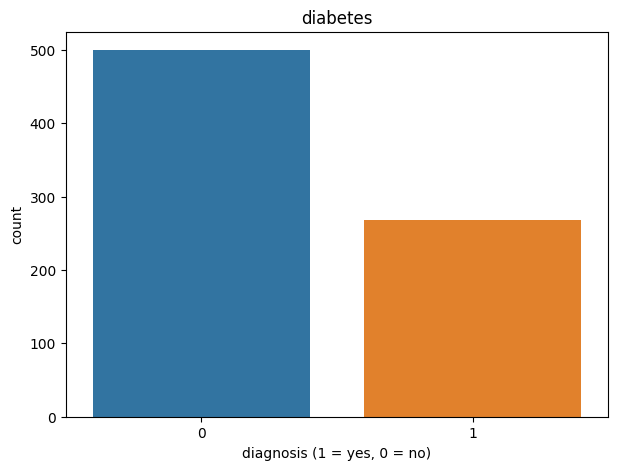

In [8]:
#data visualization

f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='class', data=df)
_ = plt.title('diabetes')
_ = plt.xlabel('diagnosis (1 = yes, 0 = no)')

In [9]:
#process null values drop replace mean
df=df.fillna(method='ffill')

In [10]:
#Split the data into training and testing datasets
x = df.drop('class', axis=1)
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
#standardize data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_prepared=scaler.fit_transform(x_train)
x_test_prepared=scaler.transform(x_test)

In [12]:
#Prepare the model
decision_tree = DecisionTreeClassifier(min_samples_split=2, max_depth=4, random_state=42)

#Optimize the model using Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy', 'balanced'],
    'max_depth': [2, 3, 4, 5, 6,],
    'min_samples_split': [2, 3, 4, 5, 6],
    'max_leaf_nodes': [2, 3, 4, 5, 6,],
    'max_features': [2, 3, 4, 5, 6]
}

decision_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=decision_tree, param_grid=parameters, cv=10)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'balanced'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [13]:
print('The best parameter:\n', grid_search.best_params_)

#Print the optimal Decision Tree
optimal_decision_tree=grid_search.best_estimator_
print('The best model:\n', optimal_decision_tree)

#Print the best accuracy computed by GridSearch
print('The best accuracy on the training dataset: {:2f} %\n'.format(grid_search.best_score_*100))

The best parameter:
 {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'max_leaf_nodes': 6, 'min_samples_split': 5}
The best model:
 DecisionTreeClassifier(max_depth=3, max_features=4, max_leaf_nodes=6,
                       min_samples_split=5)
The best accuracy on the training dataset: 77.641509 %



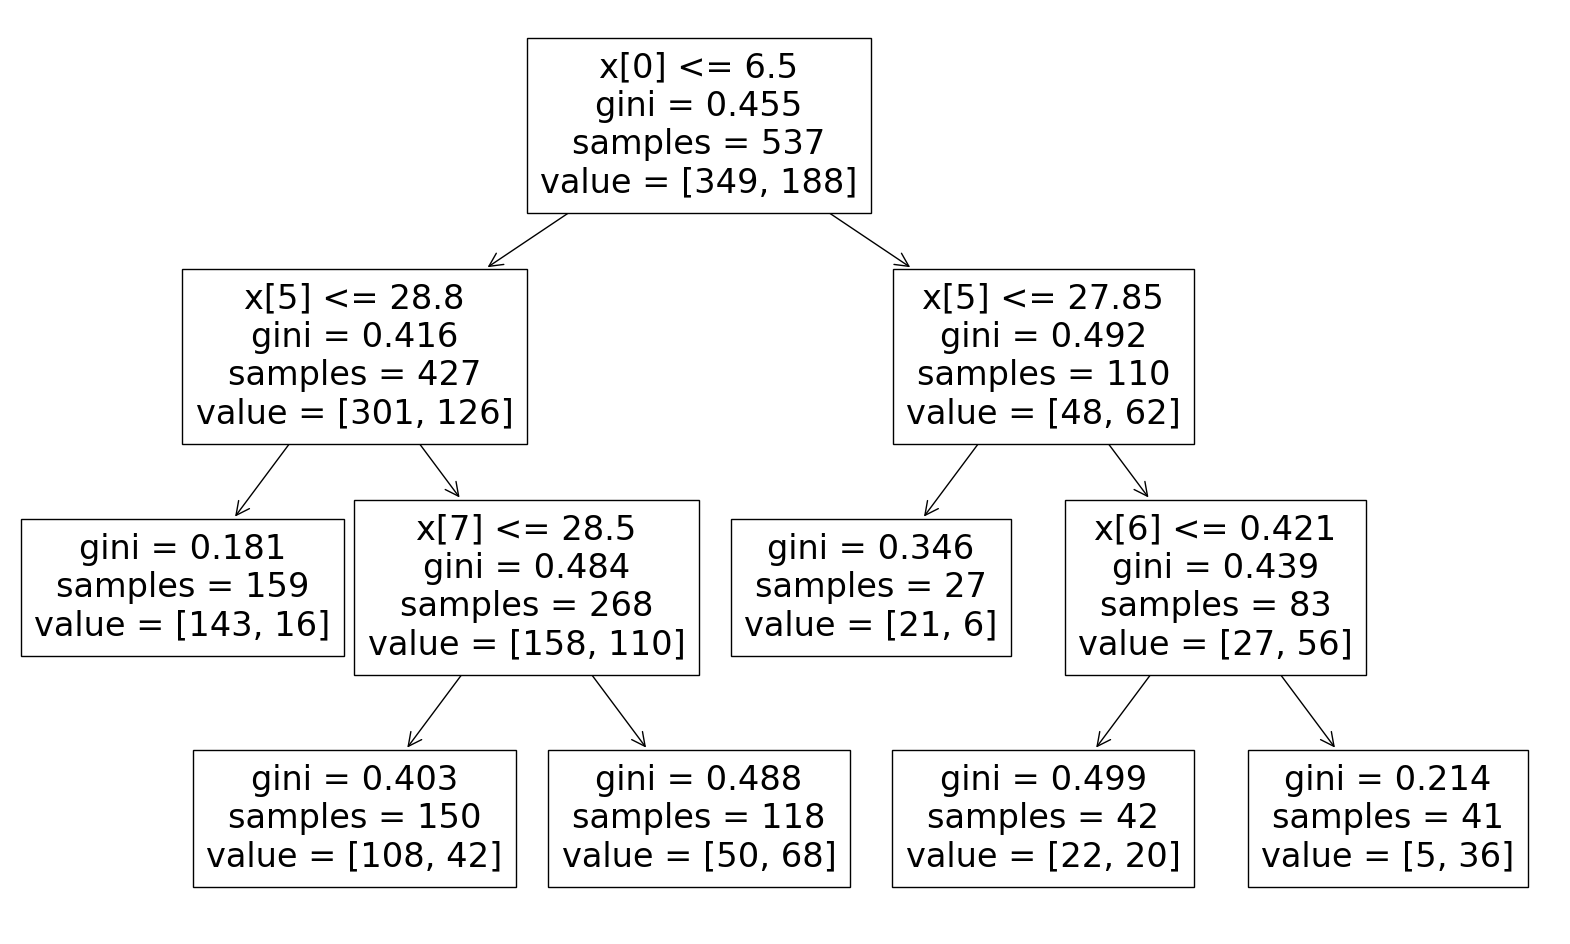

In [14]:
#Plot Decision Tree for the optimal Decision Tree that was fitted on the training dataset
plt.figure(figsize=(20,12))
plot_tree(optimal_decision_tree)
plt.savefig('tree.png')


In [15]:
optimal_pred = optimal_decision_tree.predict(x_test)

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, roc_auc_score, accuracy_score, confusion_matrix

from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
best_auc_roc = roc_auc_score(y_test, optimal_pred)
print('Optimal Model - AUC: %.4f %% \n' % best_auc_roc)



optimalscore = accuracy_score(y_test, optimal_pred)*100
print("Confusion Matrix\n", confusion_matrix(y_test, optimal_pred)) 
print("\nTest Accuracy Score on the test dataset: {:.2f} %".format(optimalscore))
print("Classification Report:\n"), classification_report(y_test, optimal_pred)

Optimal Model - AUC: 0.5925 % 

Confusion Matrix
 [[111  40]
 [ 44  36]]

Test Accuracy Score on the test dataset: 63.64 %
Classification Report:



(None,
 '              precision    recall  f1-score   support\n\n           0       0.72      0.74      0.73       151\n           1       0.47      0.45      0.46        80\n\n    accuracy                           0.64       231\n   macro avg       0.59      0.59      0.59       231\nweighted avg       0.63      0.64      0.63       231\n')